Bases:

Market maker = Proporcionan liquidez en mercados financieros, ganan dinero a través de los Spread, operan con grandes volúmenes de transacciones y tienen un inventario propio en donde compran y venden activos continuamente. 
- So = Opening Price, Precio de apertura del activo. El primer precio que se negocia un activo al abrir el mercado
- Bid = Bid Price, Precio de compra. Precio máximo que un comprador está dispuesto a pagar.
- Ask = Ask Price, Precio de venta. Precio mínimo que un vendedor está dispuesto a vender.
- Spread = Spread, Diferencial. Diferencia entre el precio ask y precio bid. 


Formulas:

- Bid Price = $Buy/\text{Open price}$
- Ask Price = $Sell/ \text{Close price}$
- Mid price = $(ask - bid) / 2$
- Spread version Richard Roll = 2 $\sqrt{-\text{cov}}$
- Spread = $(ask - bid)$
- Bid-Ask Spread (%) % = $(Ask Price - Bid Price) / Ask Price$


Paper: Richard Roll A Simple Implicit Measure of the Effective Bid-Ask Spread in an Efficient Market.pdf

Richard Roll menciona en el paper que hay una forma de calcular el Spread justo para un mercado eficiente, teniendo como supuestos que el mercado solo puede tomar dos valores, ir a la alza bid, o a la baja ask, no sabemos si en el futuro pueda
volver a bajar o a subir si una vez ya lo hizo. 
Supuestos: 
1) The asset is traded in an informationally efficient market.
2) The probability distribution of observed price changes is stationary (at least
for short intervals of, say, two months). 

## Calculando el valor Bid-Ask Spread

INVALID_TICKER: No data found, symbol may be delisted


No data available for ticker: INVALID_TICKER
                           AAPL_bid_ask_spread  MSFT_bid_ask_spread  \
2024-04-25 00:00:00-04:00             0.359513             5.000989   
2024-04-26 00:00:00-04:00            -0.579216            -5.839473   
2024-04-29 00:00:00-04:00             0.129829            -2.994599   
2024-04-30 00:00:00-04:00            -2.995936           -12.138110   
2024-05-01 00:00:00-04:00            -0.279620             2.325822   

                           GOOGL_bid_ask_spread  
2024-04-25 00:00:00-04:00              4.669998  
2024-04-26 00:00:00-04:00             -2.419998  
2024-04-29 00:00:00-04:00             -2.910004  
2024-04-30 00:00:00-04:00             -2.830002  
2024-05-01 00:00:00-04:00             -0.440002  


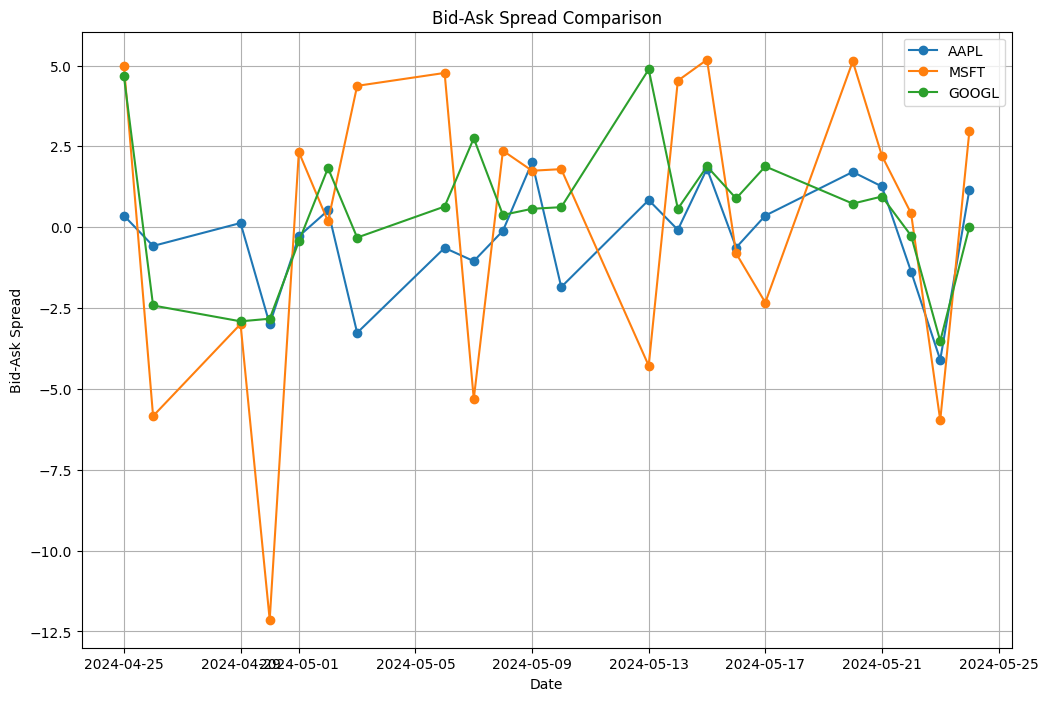

In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of ticker symbols and the period for historical data
ticker_symbols = ['AAPL', 'MSFT', 'GOOGL', 'INVALID_TICKER']  # Including an invalid ticker for demonstration
period = '1mo'  # One month of data

# Initialize a DataFrame to store the bid-ask spreads
bid_ask_spreads = pd.DataFrame()

for ticker_symbol in ticker_symbols:
    try:
        # Download historical data
        ticker = yf.Ticker(ticker_symbol)
        historical_data = ticker.history(period=period)

        # Ensure data is available
        if historical_data.empty:
            print(f"No data available for ticker: {ticker_symbol}")
            continue

        # Note: yfinance does not provide bid and ask prices directly.
        # This example assumes 'Open' as bid and 'Close' as ask
        historical_data['bid_price'] = historical_data['Open']
        historical_data['ask_price'] = historical_data['Close']

        # Calculate bid-ask spread
        historical_data[f'{ticker_symbol}_bid_ask_spread'] = historical_data['ask_price'] - historical_data['bid_price']

        # Append the bid-ask spread to the DataFrame
        bid_ask_spreads = pd.concat([bid_ask_spreads, historical_data[f'{ticker_symbol}_bid_ask_spread']], axis=1)

    except Exception as e:
        print(f"Error processing ticker {ticker_symbol}: {e}")


# Display first few rows to verify
print(bid_ask_spreads.head())

# Plot the bid-ask spreads
plt.figure(figsize=(12, 8))

for ticker_symbol in ticker_symbols:
    if f'{ticker_symbol}_bid_ask_spread' in bid_ask_spreads.columns:
        plt.plot(bid_ask_spreads.index, bid_ask_spreads[f'{ticker_symbol}_bid_ask_spread'], marker='o', linestyle='-', label=ticker_symbol)

plt.title('Bid-Ask Spread Comparison')
plt.xlabel('Date')
plt.ylabel('Bid-Ask Spread')
plt.legend()
plt.grid(True)
plt.show()


# Code using Richard Roll method Spread = 2sqrt(-cov)

INVALID_TICKER: No data found, symbol may be delisted


No data available for ticker: INVALID_TICKER
                           AAPL_bid_ask_spread  AAPL_spread_commission  \
Date                                                                     
2024-04-25 00:00:00-04:00             0.359513               15.850964   
2024-04-26 00:00:00-04:00            -0.579216               15.850964   
2024-04-29 00:00:00-04:00             0.129829               15.850964   
2024-04-30 00:00:00-04:00            -2.995936               15.850964   
2024-05-01 00:00:00-04:00            -0.279620               15.850964   

                           MSFT_bid_ask_spread  MSFT_spread_commission  \
Date                                                                     
2024-04-25 00:00:00-04:00             5.000989               22.938396   
2024-04-26 00:00:00-04:00            -5.839473               22.938396   
2024-04-29 00:00:00-04:00            -2.994599               22.938396   
2024-04-30 00:00:00-04:00           -12.138110               22.93

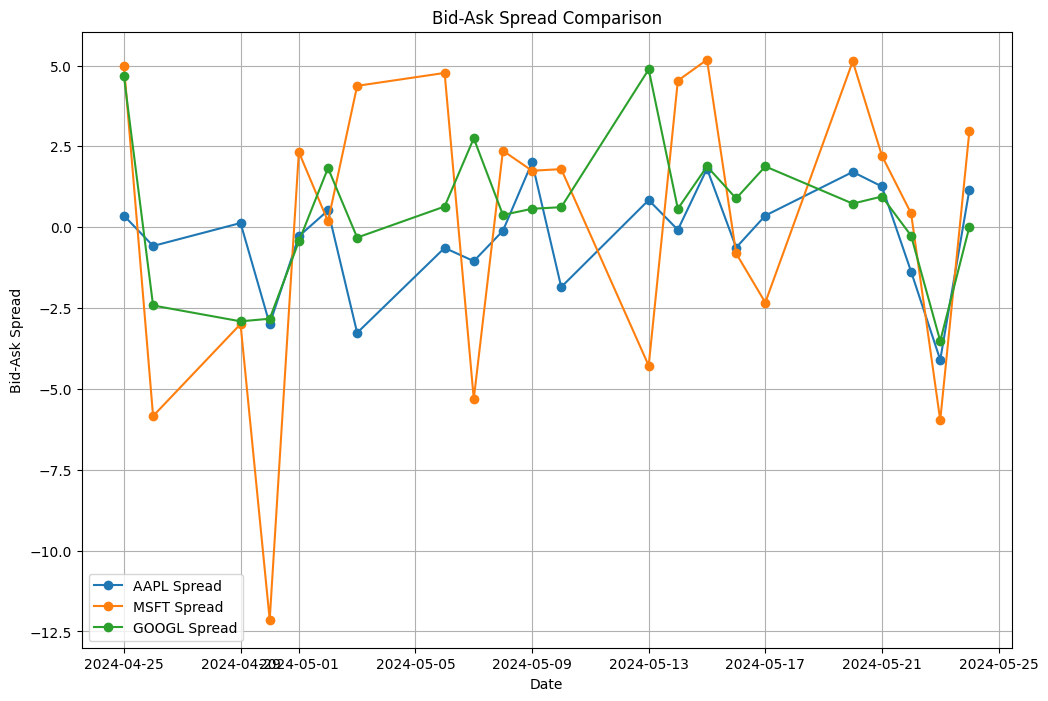

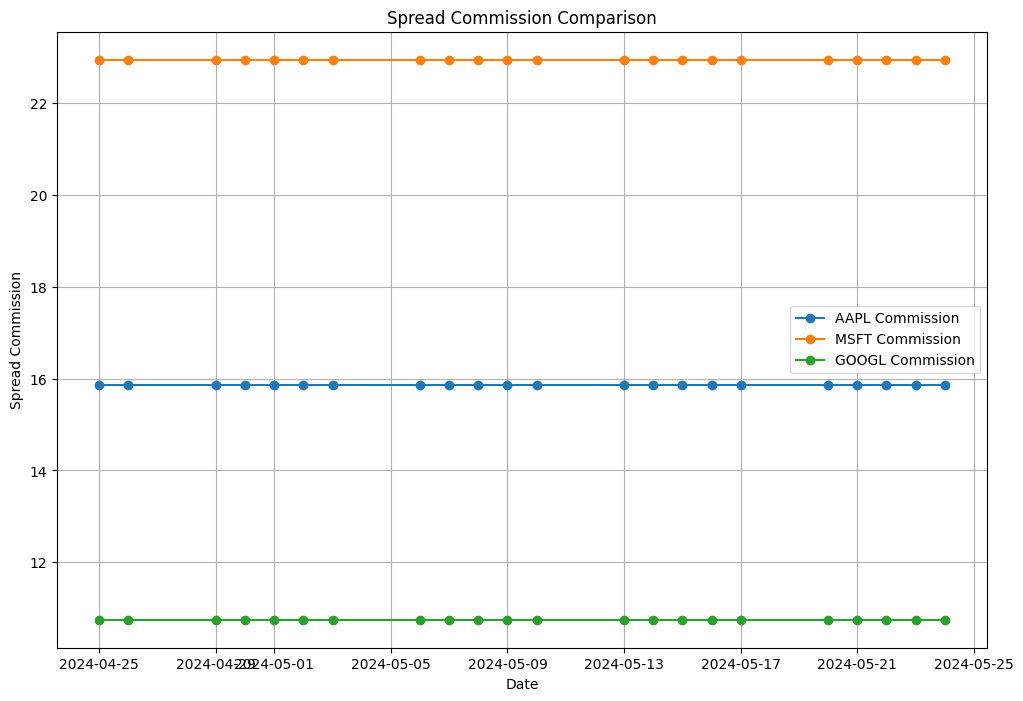

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the list of ticker symbols and the period for historical data
ticker_symbols = ['AAPL', 'MSFT', 'GOOGL', 'INVALID_TICKER']  # Including an invalid ticker for demonstration
period = '1mo'  # One month of data

# Initialize a DataFrame to store the bid-ask spreads and spread commissions
bid_ask_spreads = pd.DataFrame()

for ticker_symbol in ticker_symbols:
    try:
        # Download historical data
        ticker = yf.Ticker(ticker_symbol)
        historical_data = ticker.history(period=period)

        # Ensure data is available
        if historical_data.empty:
            print(f"No data available for ticker: {ticker_symbol}")
            continue

        # Note: yfinance does not provide bid and ask prices directly.
        # This example assumes 'Open' as bid and 'Close' as ask
        historical_data['bid_price'] = historical_data['Open']
        historical_data['ask_price'] = historical_data['Close']

        # Calculate bid-ask spread
        historical_data[f'{ticker_symbol}_bid_ask_spread'] = historical_data['ask_price'] - historical_data['bid_price']

        # Calculate covariance between bid and ask prices
        cov = np.cov(historical_data['bid_price'], historical_data['ask_price'])[0, 1]

        # Calculate spread commission using the absolute value of covariance
        spread_commission = 2 * np.sqrt(abs(cov))
        historical_data[f'{ticker_symbol}_spread_commission'] = spread_commission

        # Append the bid-ask spread and spread commission to the DataFrame
        bid_ask_spreads = pd.concat([bid_ask_spreads, historical_data[[f'{ticker_symbol}_bid_ask_spread', f'{ticker_symbol}_spread_commission']]], axis=1)

    except Exception as e:
        print(f"Error processing ticker {ticker_symbol}: {e}")

# Display first few rows to verify
print(bid_ask_spreads.head())

# Plot the bid-ask spreads
plt.figure(figsize=(12, 8))

for ticker_symbol in ticker_symbols:
    if f'{ticker_symbol}_bid_ask_spread' in bid_ask_spreads.columns:
        plt.plot(bid_ask_spreads.index, bid_ask_spreads[f'{ticker_symbol}_bid_ask_spread'], marker='o', linestyle='-', label=f'{ticker_symbol} Spread')

plt.title('Bid-Ask Spread Comparison')
plt.xlabel('Date')
plt.ylabel('Bid-Ask Spread')
plt.legend()
plt.grid(True)
plt.show()

# Plot the spread commissions
plt.figure(figsize=(12, 8))

for ticker_symbol in ticker_symbols:
    if f'{ticker_symbol}_spread_commission' in bid_ask_spreads.columns:
        plt.plot(bid_ask_spreads.index, bid_ask_spreads[f'{ticker_symbol}_spread_commission'], marker='o', linestyle='-', label=f'{ticker_symbol} Commission')

plt.title('Spread Commission Comparison')
plt.xlabel('Date')
plt.ylabel('Spread Commission')
plt.legend()
plt.grid(True)
plt.show()
